In [1]:
import torch
import numpy
import matplotlib.pyplot as plt

In [2]:
TEST_DATA_SIZE = 100
X = numpy.random.rand(TEST_DATA_SIZE, 1)
Y = numpy.random.rand(TEST_DATA_SIZE, 1)

In [3]:
input_layer = 1
output_layer = 1
learning_rate = 1e-5

def train(hidden_layer: int, epochs: int, print_debug_info: bool = False) -> None:
    device = "cuda" if torch.cuda.is_available() else "cpu"

    x_tensor = torch.tensor(X, device=device, dtype=torch.float64)
    y_tensor = torch.tensor(Y, device=device, dtype=torch.float64)

    weights_layer1 = torch.rand(input_layer, hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer1 = torch.rand(hidden_layer, requires_grad=True, device=device, dtype=torch.float64)
    weights_layer2 = torch.rand(hidden_layer, output_layer, requires_grad=True, device=device, dtype=torch.float64)
    biases_layer2 = torch.rand(output_layer, requires_grad=True, device=device, dtype=torch.float64)

    def predict() -> torch.Tensor:
        return (x_tensor @ weights_layer1 + biases_layer1) @ weights_layer2 + biases_layer2

    for i in range(epochs):
        predicted = predict()
        loss = torch.sum(torch.pow(torch.sub(y_tensor, predicted), 2))

        if print_debug_info:
            iteration_id = i + 1
            if iteration_id % 500 == 0:
                print(f"Info at epoch #{iteration_id}:")
                print(f"Loss: {loss.item()}")

        loss.backward()

        with torch.no_grad():
            weights_layer1 -= learning_rate * weights_layer1.grad
            biases_layer1 -= learning_rate * biases_layer1.grad
            weights_layer2 -= learning_rate * weights_layer2.grad
            biases_layer2 -= learning_rate * biases_layer2.grad

            weights_layer1.grad = None
            biases_layer1.grad = None
            weights_layer2.grad = None
            biases_layer2.grad = None

    final_prediction = numpy.array(predict().detach().cpu())

    plt.title(f"Training a 2D regression model with {hidden_layer} neurons within the hidden layer after {epochs} epochs")
    plt.scatter(X, Y)
    plt.plot(X, final_prediction)
    plt.show()

Info at epoch #500:
Loss: 8.132708268637064
Info at epoch #1000:
Loss: 8.033523168401322
Info at epoch #1500:
Loss: 8.006570339732768
Info at epoch #2000:
Loss: 7.984973006837112
Info at epoch #2500:
Loss: 7.965197630027118
Info at epoch #3000:
Loss: 7.946910603237709
Info at epoch #3500:
Loss: 7.929958920867991
Info at epoch #4000:
Loss: 7.914215188863622
Info at epoch #4500:
Loss: 7.899567234213161
Info at epoch #5000:
Loss: 7.885915629562609


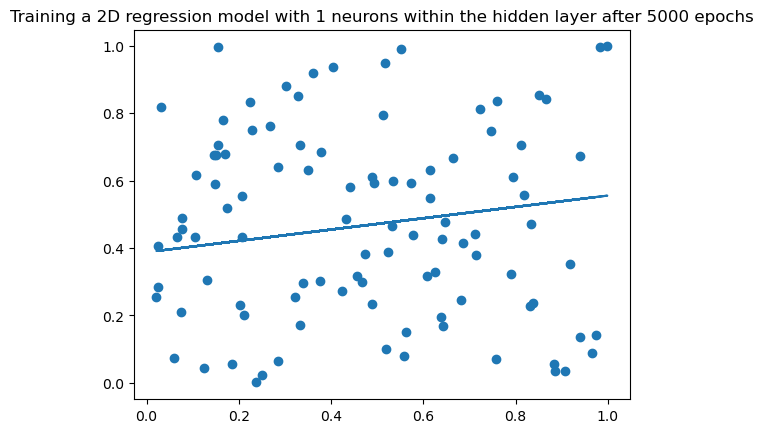

Info at epoch #500:
Loss: 7.604874147978721
Info at epoch #1000:
Loss: 7.594929331275809
Info at epoch #1500:
Loss: 7.593828990327058
Info at epoch #2000:
Loss: 7.593037935341087
Info at epoch #2500:
Loss: 7.5924690544389
Info at epoch #3000:
Loss: 7.592059869455735
Info at epoch #3500:
Loss: 7.591765503158765
Info at epoch #4000:
Loss: 7.591553708366659
Info at epoch #4500:
Loss: 7.591401305938918
Info at epoch #5000:
Loss: 7.591291630322345


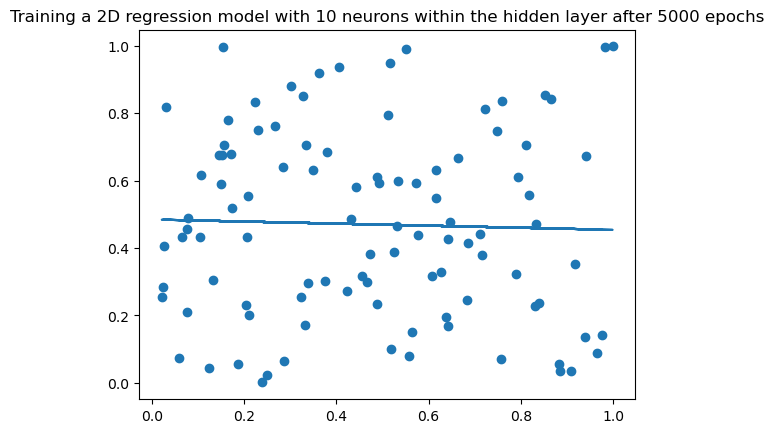

Info at epoch #500:
Loss: 10.068352470638025
Info at epoch #1000:
Loss: 7.674557698765039
Info at epoch #1500:
Loss: 7.593826909755488
Info at epoch #2000:
Loss: 7.591104860206119
Info at epoch #2500:
Loss: 7.591013097921266
Info at epoch #3000:
Loss: 7.591010004680401
Info at epoch #3500:
Loss: 7.591009900410314
Info at epoch #4000:
Loss: 7.591009896895473
Info at epoch #4500:
Loss: 7.591009896776993
Info at epoch #5000:
Loss: 7.591009896773


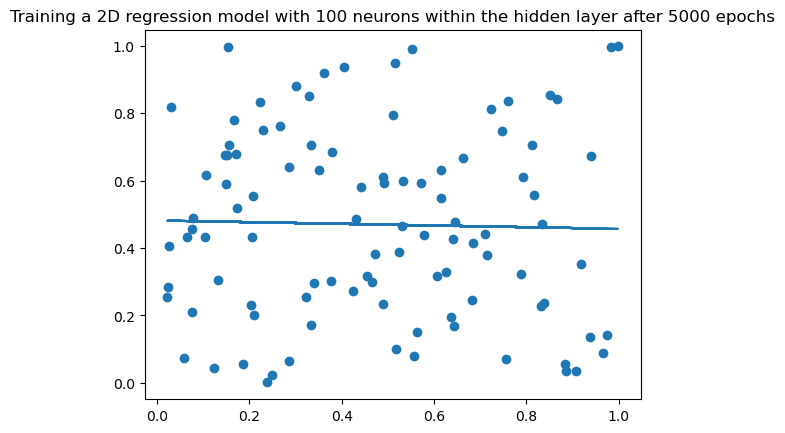

In [4]:
train(1, 5_000, print_debug_info=True)
train(10, 5_000, print_debug_info=True)
train(100, 5_000, print_debug_info=True)
